# Import packages

In [1]:
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import os,sys
from PIL import Image
sys.path.append("..")
from utils import *

# Helpers functions

In [2]:
# Helper functions

def load_image(infilename):
    data = mpimg.imread(infilename)
    return data

def img_float_to_uint8(img):
    rimg = img - np.min(img)
    rimg = (rimg / np.max(rimg) * 255).round().astype(np.uint8)
    return rimg

# Concatenate an image and its groundtruth
def concatenate_images(img, gt_img):
    nChannels = len(gt_img.shape)
    w = gt_img.shape[0]
    h = gt_img.shape[1]
    if nChannels == 3:
        cimg = np.concatenate((img, gt_img), axis=1)
    else:
        gt_img_3c = np.zeros((w, h, 3), dtype=np.uint8)
        gt_img8 = img_float_to_uint8(gt_img)          
        gt_img_3c[:,:,0] = gt_img8
        gt_img_3c[:,:,1] = gt_img8
        gt_img_3c[:,:,2] = gt_img8
        img8 = img_float_to_uint8(img)
        cimg = np.concatenate((img8, gt_img_3c), axis=1)
    return cimg

def img_crop(im, w, h):
    list_patches = []
    imgwidth = im.shape[0]
    imgheight = im.shape[1]
    is_2d = len(im.shape) < 3
    for i in range(0,imgheight,h):
        for j in range(0,imgwidth,w):
            if is_2d:
                im_patch = im[j:j+w, i:i+h]
            else:
                im_patch = im[j:j+w, i:i+h, :]
            list_patches.append(im_patch)
    return list_patches

# Load images

In [3]:
root_dir = "../../data/training/"

image_dir = root_dir + "images/"

files = os.listdir(image_dir)
n = min(20, len(files)) #load max 5 images

print("Loading " + str(n) + " images")
imgs = [load_image(image_dir + files[i]) for i in range(n)]

gt_dir = root_dir + "groundtruth/"
print("Loading " + str(n) + " images")
gt_imgs = [load_image(gt_dir + files[i]) for i in range(n)]
n_train = 3 #use 3 images for training

Loading 20 images
Loading 20 images


# Info

Image size = 400,400


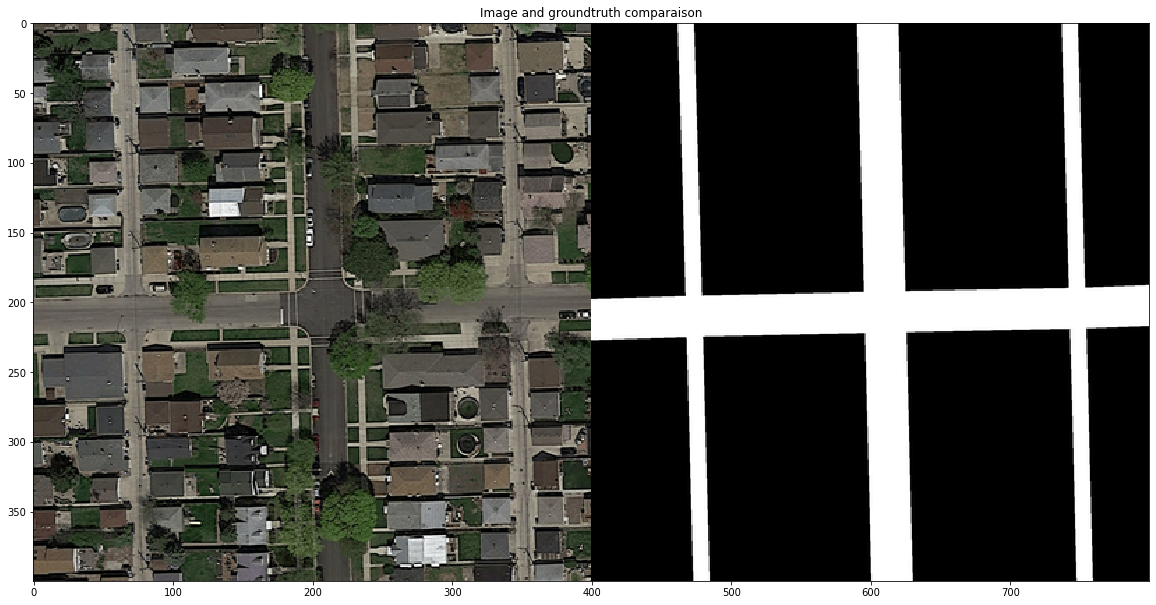

In [4]:
print('Image size = ' + str(imgs[0].shape[0]) + ',' + str(imgs[0].shape[1]))
# Show first image and its groundtruth image
cimg = concatenate_images(imgs[0], gt_imgs[0])
fig1 = plt.figure(figsize=(20, 20))
plt.title('Image and groundtruth comparaison')
plt.imshow(cimg, cmap='Greys_r')

# Gaussian function

In [12]:
#Apply gaussian blur to images
from scipy.ndimage import gaussian_filter
import cv2
def convert_gaussian(_sigma, img):
    _sigma = 3
    gauss_img = gaussian_filter(img, sigma=_sigma)
    return gauss_img

# Hough Trans

In [13]:
def hough(edges, img_in, rho=1, theta = np.pi/180, threshold=15, min_line_length=70, max_line_gap=20):
    line_image = np.copy(img_in) * 0  # creating a blank to draw lines on

    # Run Hough on edge detected image
    # Output "lines" is an array containing endpoints of detected line segments
    lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)
    points =  []
    for line in lines:
        for x1, y1, x2, y2 in line:
            points.append(((x1 + 0.0, y1 + 0.0), (x2 + 0.0, y2 + 0.0)))
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 5)

    lines_edges = cv2.addWeighted(img_in, 0.8, line_image, 1, 0)
    plt.figure(figsize=(15,15))
    plt.imshow(lines_edges)

# Color selection

69


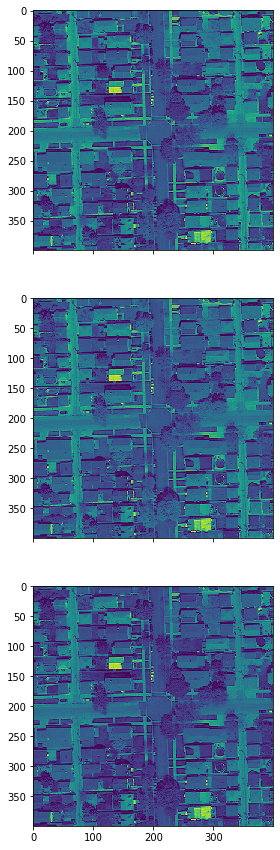

In [24]:

img_test = imgs[0]

img_red = (img_test[:,:,0]*255).astype(np.uint8)
img_green = (img_test[:,:,1]*255).astype(np.uint8)
img_blue = (img_test[:,:,2]*255).astype(np.uint8)
print(img_blue[0][0])
fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(15,15))
axs[0].imshow(img_red)
axs[1].imshow(img_green)
axs[2].imshow(img_blue)
edges = cv2.Canny(img_red,400,400,apertureSize = 3)
